# Multiple variable regression

## Imports

In [1]:
import sys
sys.path.append("../")  # append the parent directory

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from src.cost_function import quadratic_error
from src.optimizer import GradientDescent
from src.preprocess import feature_normalize, add_intercept_term, shuffle, train_test_split

## Loading data

In [3]:
file_path = "data/multi_var_house_data.txt"
file = Path(Path.cwd()).parent / file_path

with open(file) as fp:
    data = np.genfromtxt(fp, delimiter=',')
    
print(type(data), data.shape, '\n')
print(data[:3])

<class 'numpy.ndarray'> (47, 3) 

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]]


In [4]:
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape, '\n')
print(X[:3], '\n')
print(y[:3])

(47, 2) (47,) 

[[2104.    3.]
 [1600.    3.]
 [2400.    3.]] 

[399900. 329900. 369000.]


## Shaping data

In [5]:
m = data.shape[0]
n = data.shape[1] - 1
print(f' m = {m} training examples\n n = {n} features')

X = X.reshape((m, n))
y = y.reshape((m, 1))
print(X.shape, y.shape)

 m = 47 training examples
 n = 2 features
(47, 2) (47, 1)


## Preprocessing data

In [6]:
X, mean, std = feature_normalize(X)
print(X.shape, mean, std)

(47, 2) 1001.9255319148937 1143.0528202028345


In [7]:
# adding intercept term
X = add_intercept_term(X)
X.shape

(47, 3)

In [8]:
X[:5]

array([[ 1.        ,  0.96415008, -0.87391021],
       [ 1.        ,  0.52322557, -0.87391021],
       [ 1.        ,  1.22310574, -0.87391021],
       [ 1.        ,  0.36225314, -0.87478506],
       [ 1.        ,  1.74801587, -0.87303536]])

In [9]:
y[:5]

array([[399900.],
       [329900.],
       [369000.],
       [232000.],
       [539900.]])

## Regression using Gradient Descent

In [10]:
theta = np.zeros((n+1, 1))  # regression parameter
theta

array([[0.],
       [0.],
       [0.]])

In [11]:
# setting learning rate (alpha), maximum iterations (max_iter) and tolerance for optimization
grad_desc = GradientDescent(alpha=1e-2, max_iter=3000, tolerance=1e-8)
grad_desc.__dict__

{'alpha': 0.01, 'max_iter': 3000, 'tolerance': 1e-08}

In [12]:
final_theta, cost_hist = grad_desc.optimize(X, y, theta, cost_function=quadratic_error)

End of optimize: iter 3000 - cost [[2.05783061e+09]] - theta [[ 116792.97984606  153819.93135677 -102109.74043836]]


## Plotting

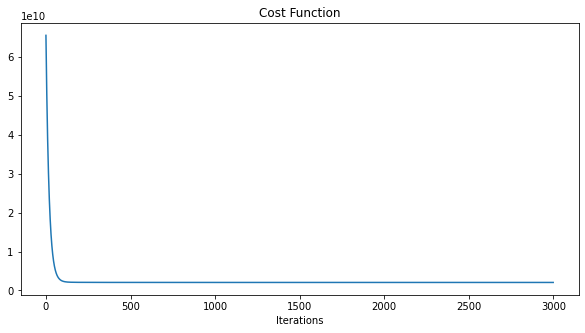

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(cost_hist.shape[0]), cost_hist)
plt.title("Cost Function")
plt.xlabel("Iterations")
plt.show()

# Using training and validation data

In [14]:
# splitting into training and validation randomly
X, y = shuffle(X, y)
x_train, y_train, x_val, y_val = train_test_split(X, y, ratio=0.8)

In [15]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(38, 3) (38, 1) (9, 3) (9, 1)


In [16]:
x_train[:5, :]

array([[ 1.        ,  0.43049145, -0.87391021],
       [ 1.        ,  0.57921599, -0.87478506],
       [ 1.        ,  1.08138001, -0.87391021],
       [ 1.        ,  0.90815967, -0.87303536],
       [ 1.        ,  0.66932556, -0.87391021]])

In [17]:
y_train[:5]

array([[242500.],
       [368500.],
       [329900.],
       [314900.],
       [252900.]])

## Regression using Gradient Descent

In [18]:
theta = np.zeros((n+1, 1))  # regression parameter
theta

array([[0.],
       [0.],
       [0.]])

In [19]:
# setting learning rate (alpha), maximum iterations (max_iter) and tolerance for optimization
grad_desc = GradientDescent(alpha=1e-2, max_iter=3000, tolerance=1e-3)
grad_desc.__dict__

{'alpha': 0.01, 'max_iter': 3000, 'tolerance': 0.001}

In [20]:
result = grad_desc.optimize_with_validation(x_train, y_train, 
                                            x_val, y_val, 
                                            theta, 
                                            cost_function=quadratic_error)
final_theta, train_cost, val_cost = result

End of optimize: iter 3000 - train cost 1688712177.529422 / val cost: 3642143039.5055504
- theta [[ 114784.89332582  158345.63425852 -100392.60892728]]


## Plotting

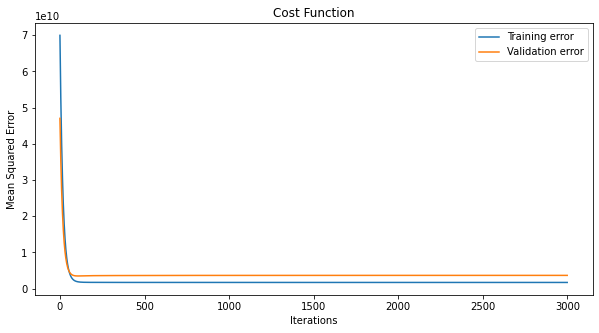

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(train_cost.shape[0]), train_cost, val_cost)
# plt.yscale("log")
plt.title("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend(["Training error", "Validation error"])
plt.show()

In [22]:
# creating a test point
xtest = np.array([1650, 3]).reshape(1, n)
xnorm = add_intercept_term((xtest - mean)/std)
price = xnorm.dot(final_theta)
print(price)
# expected around $293,081.46

[[292295.94039423]]
